<a href="https://colab.research.google.com/github/okanbuyuktepe/NLP-in-Tensorflow/blob/master/multiple_layer_convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer CONV1D

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [16]:
# Get the data
dataset , info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset , test_dataset = dataset['train'], dataset['test']

In [17]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

In [18]:
tokenizer = info.features['text'].encoder

In [19]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset  = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 240s 613ms/step - loss: 0.4433 - accuracy: 0.7877 - val_loss: 0.3141 - val_accuracy: 0.8711
Epoch 2/10
391/391 [==============================] - 240s 613ms/step - loss: 0.2213 - accuracy: 0.9166 - val_loss: 0.3305 - val_accuracy: 0.8652
Epoch 3/10
391/391 [==============================] - 241s 616ms/step - loss: 0.1709 - accuracy: 0.9381 - val_loss: 0.3181 - val_accuracy: 0.8725
Epoch 4/10
391/391 [==============================] - 239s 611ms/step - loss: 0.1368 - accuracy: 0.9497 - val_loss: 0.3618 - val_accuracy: 0.8676
Epoch 5/10
391/391 [==============================] - 237s 607ms/step - loss: 0.1124 - accuracy: 0.9592 - val_loss: 0.4424 - val_accuracy: 0.8580
Epoch 6/10
391/391 [==============================] - 245s 626ms/step - loss: 0.0897 - accuracy: 0.9696 - val_loss: 0.5237 - val_accuracy: 0.8579
Epoch 7/10
391/391 [==============================] - 240s 613ms/step - loss: 0.0716 - accuracy: 0.9769 - val_loss: 0.6013 -

In [24]:
import matplotlib.pyplot as plt

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

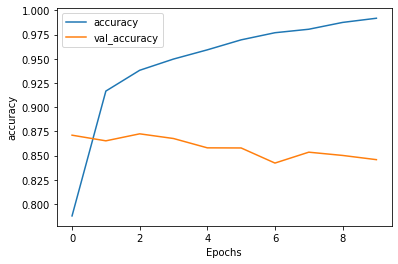

In [26]:
plot_graphs(history, 'accuracy')

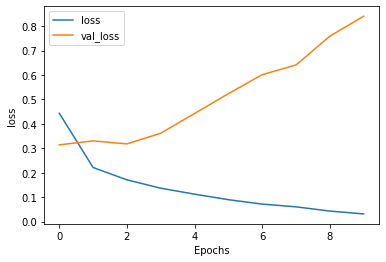

In [27]:
plot_graphs(history, 'loss')